In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn import linear_model

from scipy.stats import norm

import seaborn as sns
import pickle

In [147]:
df = pd.read_csv('./dataset-cleaned_v2.csv')

In [148]:
df.head()

,Unnamed: 0,index,Location,Price,Beds,Baths,House Size,Land Size,0,1,...,33,34,35,36,37,38,39,h_l_ratio,Bed Size,b_b_ratio
0,0,0,Piliyandala,12500000.0,4.0,2.0,1750.0,6.5,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.988910,437.500000,2.000000
1,1,1,Kottawa,29500000.0,4.0,4.0,3510.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.432507,877.500000,1.000000
2,2,2,Malabe,19000000.0,4.0,3.0,2850.0,7.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.395776,712.500000,1.333333
3,3,3,Kottawa,35000000.0,7.0,4.0,1700.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.416284,242.857143,1.750000
4,4,4,Boralesgamuwa,29500000.0,5.0,4.0,3500.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.606979,700.000000,1.250000


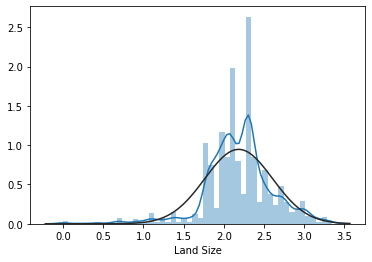

In [149]:
sns.distplot(np.log(df[df['Land Size'] < 30]['Land Size']), fit=norm)

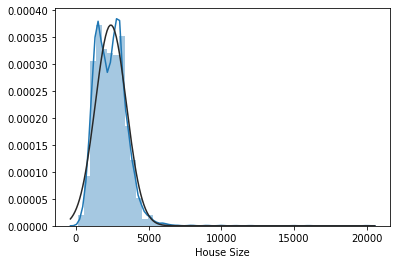

In [150]:
sns.distplot(df['House Size'], fit=norm)

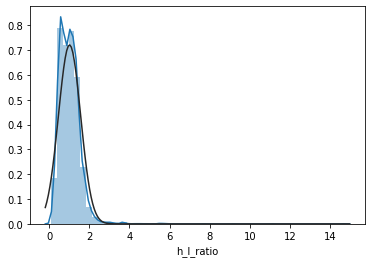

In [151]:
sns.distplot(df['h_l_ratio'], fit=norm)

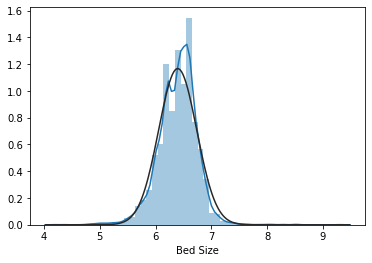

In [152]:
sns.distplot(np.log(df['Bed Size']), fit=norm)

<h1>Check correlation

In [153]:
cols = ['Price', 'Beds', 'Baths', 'House Size', 'Land Size', 'h_l_ratio', 'Bed Size', 'b_b_ratio']
all_cols = [ 'Beds', 'Baths', 'House Size', 'Land Size', 'h_l_ratio', 'Bed Size', 'b_b_ratio',  '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39']

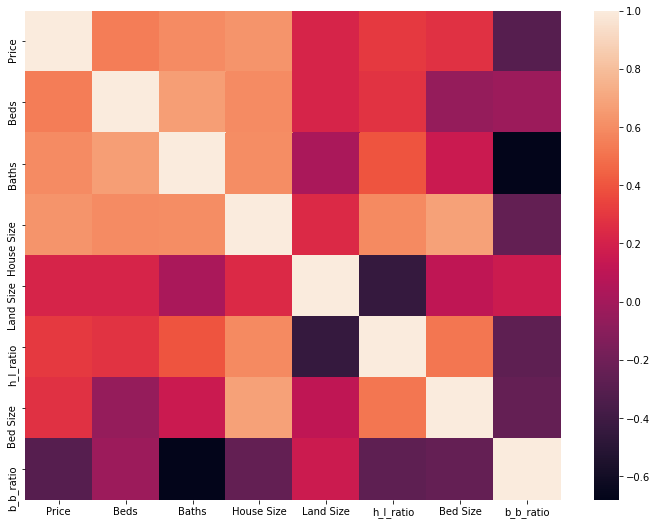

In [154]:
corr_mat = df[cols].corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corr_mat)

In [155]:
def cluster(df_to_cluster, n_cluster):
    km = KMeans(
        n_clusters=n_cluster
    )
    km.fit(df_to_cluster)
    y_km = km.predict(df_to_cluster)
    return y_km

In [156]:
def build_rf_model(df_house, x_cols, y_col):
    print('***************************************************************')
    estimators = np.arange(10, 400, 10)
    results = []
    scores = []
    Y_pred = []
    X_train, X_test, Y_train, Y_test = train_test_split(df_house[x_cols], df_house[y_col],test_size=0.33)
    rf_model = RandomForestRegressor(n_jobs=-1)
    for n in estimators:
        rf_model.set_params(n_estimators=n)
        rf_model.fit(X_train, Y_train)
        Y_pred = rf_model.predict(X_test)
        score = rf_model.score(X_test, Y_test)
        rmse= np.sqrt(((Y_pred - Y_test) ** 2).mean())
        mape = (np.abs((Y_test - Y_pred)// Y_test).sum()) * (100/len(Y_test))
        scores.append(score)
        results.append((score, rmse, mape))
    plt.title('Random Forest Score with diffent n estimators')
    plt.xlabel('n_estimator')
    plt.ylabel('score')
    plt.plot(estimators, scores )
    print('min score: ' + str(min([val[0] for val in results])))
    print('max score: ' + str(max([val[0] for val in results])))
    print('min rmse: ' + str(min([val[1] for val in results])))
    print('max rmse: ' + str(max([val[1] for val in results])))
    print('min mape: ' + str(min([val[2] for val in results])))
    print('max mape: ' + str(max([val[2] for val in results])))
    print('***************************************************************')
    return (rf_model, Y_pred, Y_test);

In [157]:
def find_best_cluster(df_house, cols_list,rf_x_cols, rf_y_col, n_cluster_max=3):
    for cols in cols_list:
        for n in range(2, n_cluster_max + 1):
            y_km = cluster(df_house[cols], n)
            print('-----------------------------------------------')
            print(str(cols))
            print('-----------------------------------------------')
            print('Size of clusters : ' + str([ df_house[y_km == i].shape[0] for i in range(n)]))
            print('-----------------------------------------------')
            for i in range(0, n): 
                if (df_house[y_km == i].shape[0] > 50):
                    build_rf_model(df_house[y_km == i],
                          rf_x_cols,
                          rf_y_col)
                else:
                    print('small cluster ignored')
            

<h1>Evaluvate features important

In [158]:
rf_model = build_rf_model(df, all_cols, "Price")[0]

***************************************************************


KeyboardInterrupt: 

In [ ]:
for f in zip(all_cols,rf_model.feature_importances_):
    print(f)

In [160]:
imp1_cols_exp = [  'Baths', 'House Size', 'Land Size',  '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39']

***************************************************************
min score: 0.6723391031469196
max score: 0.7022571753136411
min rmse: 5986169.55188509
max rmse: 6279725.6315846685
min mape: 57.80896333182435
max mape: 59.80081484834766
***************************************************************


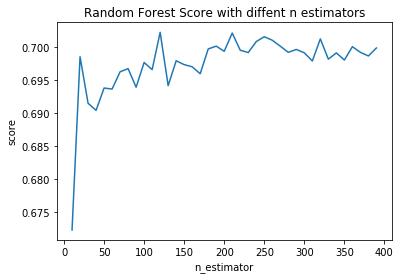

In [161]:
rf_model_imp1 = build_rf_model(df, imp1_cols_exp, "Price")[0]

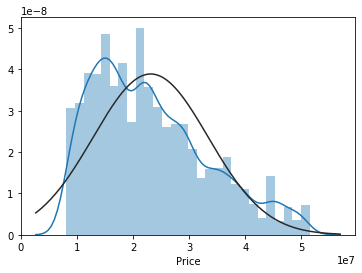

In [162]:
sns.distplot(df[df['Price'] > .8e7]['Price'], fit=norm)

In [163]:
df[df["Price"] >  5e7]

,Unnamed: 0,index,Location,Price,Beds,Baths,House Size,Land Size,0,1,...,33,34,35,36,37,38,39,h_l_ratio,Bed Size,b_b_ratio
216,246,281,Malabe,51000000.0,3.0,4.0,4000.0,27.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.542154,1333.333333,0.75
851,960,1238,Rajagiriya,51500000.0,7.0,4.0,1700.0,6.2,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.007139,242.857143,1.75
6543,7211,12245,Dehiwala,50700000.0,5.0,2.0,3900.0,14.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.987936,780.000000,2.50


C:\Users\Shankeerthan\Anaconda3\envs\learn-ml\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


***************************************************************
min score: 0.6043526596971242
max score: 0.6401565310169601
min rmse: 5877564.632944249
max rmse: 6163036.310345031
min mape: 55.675954592363254
max mape: 58.10113519091847
***************************************************************


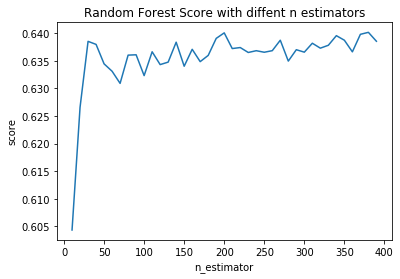

In [164]:
rf_model_above_half_crore_out = build_rf_model(df[df["Price"] > 8e6][df["Price"] < 5e7], imp1_cols_exp, "Price")

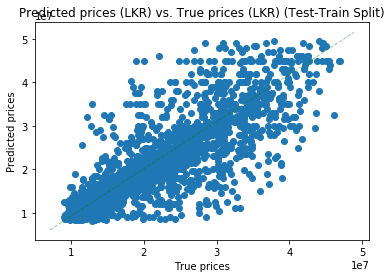

In [165]:
plt.scatter(rf_model_above_half_crore_out[1], rf_model_above_half_crore_out[2])
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.plot([xmin, xmax], [ymin, ymax], "g--", lw=1, alpha=0.4)
plt.xlabel("True prices")
plt.ylabel("Predicted prices")
plt.title('Predicted prices (LKR) vs. True prices (LKR) (Test-Train Split)')
plt.show()

In [166]:
y_pred = rf_model_above_half_crore_out[1];
y_test = rf_model_above_half_crore_out[2]

In [167]:
mse = np.sum(np.abs(y_pred-y_test))/len(y_test)

In [168]:
mse

3935771.626711752

<h1>Consider location with more than 100 houses

In [177]:
(df.groupby('Location').count()['Price'])

Location
Angoda             94
Athurugiriya      400
Avissawella        26
Battaramulla      272
Boralesgamuwa     315
Colombo 10         26
Colombo 12         11
Colombo 13          8
Colombo 14         11
Colombo 15         35
Colombo 2           2
Colombo 3           4
Colombo 4           2
Colombo 5          24
Colombo 6          20
Colombo 7           5
Colombo 8          10
Colombo 9          21
Dehiwala          236
Hanwella           17
Homagama          359
Kaduwela          102
Kesbewa           253
Kohuwala           30
Kolonnawa          73
Kottawa           464
Kotte              92
Maharagama        193
Malabe            719
Moratuwa          172
Mount Lavinia      82
Nawala             37
Nugegoda          239
Padukka            50
Pannipitiya       209
Piliyandala      1425
Rajagiriya         85
Ratmalana          73
Talawatugoda      403
Wellampitiya       93
Name: Price, dtype: int64

In [178]:
locs_above_100 = ['Talawatugoda', 'Piliyandala', 'Pannipitiya', 'Nugegoda', 'Moratuwa', 'Malabe', 'Maharagama', 'Kottawa', 'Kesbewa',
                 'Kaduwela', 'Homagama', 'Dehiwala', 'Boralesgamuwa', 'Battaramulla', 'Athurugiriya']

In [183]:
df_loc_above_100 = df[(df.Location.isin(locs_above_100))]


In [184]:
df_loc_above_100 =df_loc_above_100.drop(['0','1','2','3','4', '5', '6', '7','8','9','10', '11', '12','13', '14', '15', '16', 
             '17','18','19', '20', '21', '22',
    '23','24','25', '26', '27','28','29', '30', '31', '32','33','34', '35', '36', '37','38',  '39'], axis=1)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_loc_above_100['Location'].apply(lambda x: str(x)).values.reshape(-1,1))
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
ohe_df = pd.DataFrame(onehot_encoded)
# # data = pd.concat([df, ohe_df], axis=1).drop(['Location'], axis=1)
df_loc_above_100 = pd.concat([df_loc_above_100, ohe_df], axis=1)

C:\Users\Shankeerthan\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [199]:
df_loc_above_100 =df_loc_above_100.dropna()

In [200]:
df_loc_above_100.columns = [str(c) for c in df_loc_above_100.columns]
df_loc_above_100 = df_loc_above_100.dropna()

***************************************************************
min score: 0.4613690801745334
max score: 0.4892340200088796
min rmse: 7481786.963749641
max rmse: 7683162.108859365
min mape: 58.200734394124844
max mape: 60.893512851897185
***************************************************************


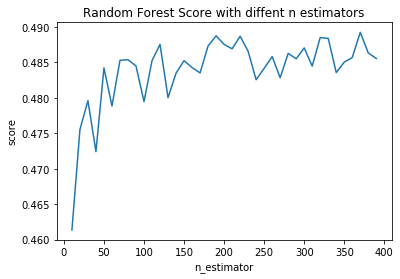

In [202]:
rf_loc_above_100 = build_rf_model(df_loc_above_100, ['House Size', 'Land Size', 'Beds','0','1','2','3','4', '5', '6', '7','8','9','10', '11', '12','13', '14'], 'Price')

<h1>Reduce locations to n_components

In [110]:
from sklearn.decomposition import PCA


In [130]:
pca = PCA(n_components=10)
pca.fit(df[['0','1','2','3','4', '5', '6', '7','8','9','10', '11', '12','13', '14', '15', '16', 
             '17','18','19', '20', '21', '22',
    '23','24','25', '26', '27','28','29', '30', '31', '32','33','34', '35', '36', '37','38',  '39']])
pca_t1 = pca.transform(df[['0','1','2','3','4', '5', '6', '7','8','9','10', '11', '12','13', '14', '15', '16', 
             '17','18','19', '20', '21', '22',
    '23','24','25', '26', '27','28','29', '30', '31', '32','33','34', '35', '36', '37','38',  '39']])

In [131]:
df_pca1 = pd.concat([df[['Price', 'House Size', 'Land Size', 'Beds', 'Baths', 'h_l_ratio', 'b_b_ratio', 'Bed Size']],  pd.DataFrame(pca_t1)], axis=1)

***************************************************************
min score: 0.6469743237292114
max score: 0.6831854447918455
min rmse: 6137951.604393006
max rmse: 6479239.6511853505
min mape: 75.19239474875509
max mape: 77.54640108646446
***************************************************************


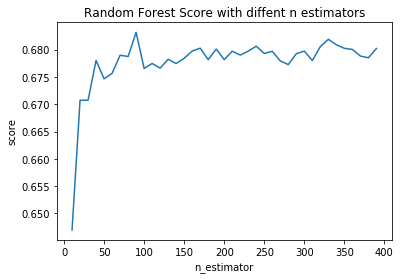

In [133]:
rf_pca1 = build_rf_model(df_pca1, ['House Size', 'Land Size', 'Beds', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'Price')

<h1> Experiment 1 with highly correlated features

In [26]:
exp1_cols = ['House Size', 'Beds','Land Size', '0','1','2','3','4', '5', '6', '7','8','9','10', '11', '12','13', '14', '15', '16', 
             '17','18','19', '20', '21', '22',
    '23','24','25', '26', '27','28','29', '30', '31', '32','33','34', '35', '36', '37','38',  '39' ]

***************************************************************
min score: 0.6460188585831466
max score: 0.6761966526036158
min rmse: 9195644.123188004
max rmse: 9614607.311641902
min mape: 79.11832946635731
max mape: 82.5986078886311
***************************************************************


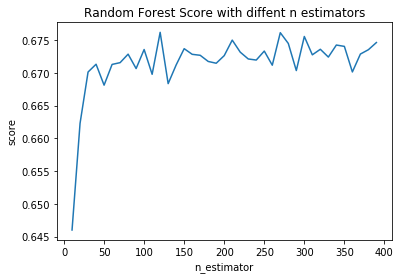

In [27]:
build_rf_model(df, exp1_cols, 'Price')

<h2>Experiment 2 ['House Size', 'Beds', '0','1','2','3','4', '5', '6', '7','8','9','10', '11', '12','13', '14', '15', '16', 
             '17','18','19', '20', '21', '22',
    '23','24','25', '26', '27','28','29', '30', '31', '32','33','34', '35', '36', '37','38',  '39' ]

In [29]:
exp2_cols = ['House Size', 'Beds', '0','1','2','3','4', '5', '6', '7','8','9','10', '11', '12','13', '14', '15', '16', 
             '17','18','19', '20', '21', '22',
    '23','24','25', '26', '27','28','29', '30', '31', '32','33','34', '35', '36', '37','38',  '39' ]

***************************************************************
min score: 0.5338690930011334
max score: 0.5608018221638722
min rmse: 10569195.453746751
max rmse: 10888438.799964897
min mape: 76.5661252900232
max mape: 81.61252900232019
***************************************************************


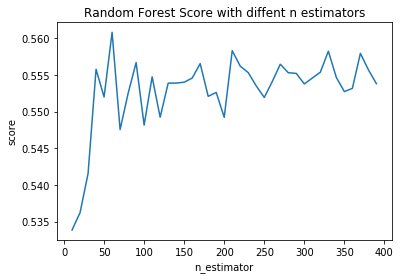

In [30]:
build_rf_model(df, exp2_cols, 'Price')

<h1>Experiment 3

In [32]:
exp3_cols = ['House Size', 'Beds','Land Size', 'Baths', '0','1','2','3','4', '5', '6', '7','8','9','10', '11', '12','13', '14', '15', '16', 
             '17','18','19', '20', '21', '22',
    '23','24','25', '26', '27','28','29', '30', '31', '32','33','34', '35', '36', '37','38',  '39' ]

***************************************************************
min score: 0.6831894578323334
max score: 0.7004050113535291
min rmse: 9196895.980910609
max rmse: 9457444.78814363
min mape: 76.21809744779583
max mape: 80.6844547563805
***************************************************************


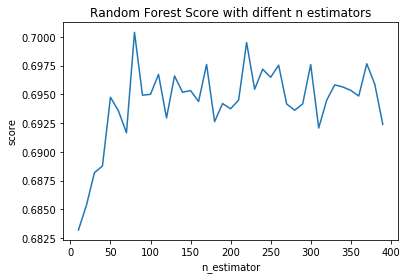

In [33]:
build_rf_model(df, exp3_cols, 'Price')

<h3> This dataset is almost clean (most variables fit normal curve approximately)

-----------------------------------------------
['House Size', 'Land Size']
-----------------------------------------------
Size of clusters : [2793, 2431]
-----------------------------------------------
***************************************************************
min score: 0.4122526782377971
max score: 0.4773785445782909
min rmse: 7864972.863399146
max rmse: 8340631.624298411
min mape: 98.0477223427332
max mape: 104.2299349240781
***************************************************************
***************************************************************
min score: 0.5753976087135529
max score: 0.6116349610455716
min rmse: 9823836.7128437
max rmse: 10271935.63520232
min mape: 58.15691158156911
max mape: 62.141967621419674
***************************************************************
-----------------------------------------------
['House Size', 'Land Size']
-----------------------------------------------
Size of clusters : [2286, 601, 2337]
-------------------------------------

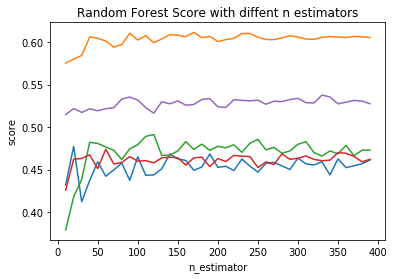

In [38]:
find_best_cluster(df, [['House Size', 'Land Size']], exp3_cols, 'Price', 3)

-----------------------------------------------
['House Size', 'Price']
-----------------------------------------------
Size of clusters : [1124, 4100]
-----------------------------------------------
***************************************************************
min score: 0.3678438809445115
max score: 0.410482738658428
min rmse: 11394233.712377252
max rmse: 11799104.113725813
min mape: 56.33423180592992
max mape: 59.83827493261455
***************************************************************
***************************************************************
min score: 0.7008742782883713
max score: 0.7209454432495732
min rmse: 4163262.578236423
max rmse: 4310385.60091435
min mape: 66.4449371766445
max mape: 68.9578713968958
***************************************************************
-----------------------------------------------
['House Size', 'Price']
-----------------------------------------------
Size of clusters : [3110, 352, 1762]
---------------------------------------------

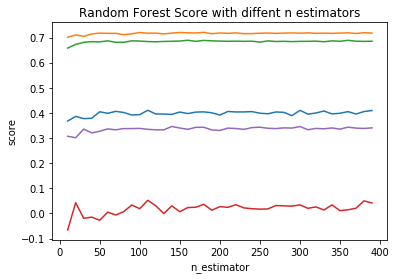

In [39]:
find_best_cluster(df, [['House Size', 'Price']], exp3_cols, 'Price', 3)

-----------------------------------------------
['House Size', 'Price', 'Land Size']
-----------------------------------------------
Size of clusters : [4100, 1124]
-----------------------------------------------
***************************************************************
min score: 0.6950936414129008
max score: 0.7198082652106998
min rmse: 4140485.953578005
max rmse: 4319235.622207263
min mape: 60.088691796008874
max mape: 63.932002956393205
***************************************************************
***************************************************************
min score: 0.1585690121830733
max score: 0.20733088942020284
min rmse: 12687676.196593896
max rmse: 13072100.26021868
min mape: 54.17789757412398
max mape: 57.14285714285714
***************************************************************
-----------------------------------------------
['House Size', 'Price', 'Land Size']
-----------------------------------------------
Size of clusters : [1762, 3110, 352]
-------------

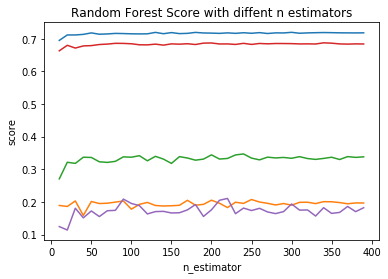

In [41]:
find_best_cluster(df, [['House Size', 'Price', 'Land Size']], exp3_cols, 'Price', 3)

-----------------------------------------------
['House Size', 'Price', 'Land Size', 'Beds']
-----------------------------------------------
Size of clusters : [4100, 1124]
-----------------------------------------------
***************************************************************
min score: 0.6564136263641218
max score: 0.6813641154884809
min rmse: 4543027.712276149
max rmse: 4717544.546798367
min mape: 64.96674057649668
max mape: 66.96230598669624
***************************************************************
***************************************************************
min score: 0.35142396240116835
max score: 0.3915438222120595
min rmse: 11295475.213394206
max rmse: 11661926.608937038
min mape: 56.60377358490565
max mape: 61.72506738544474
***************************************************************
-----------------------------------------------
['House Size', 'Price', 'Land Size', 'Beds']
-----------------------------------------------
Size of clusters : [1830, 3042, 352

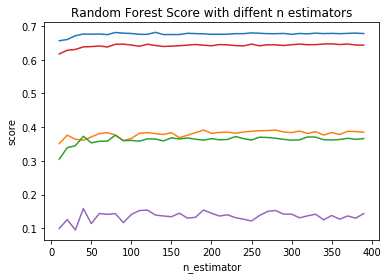

In [42]:
find_best_cluster(df, [['House Size', 'Price', 'Land Size','Beds']], exp3_cols, 'Price', 3)

-----------------------------------------------
['Price', 'Land Size']
-----------------------------------------------
Size of clusters : [4100, 1124]
-----------------------------------------------
***************************************************************
min score: 0.6781260658420168
max score: 0.7089952263927753
min rmse: 4294598.932982448
max rmse: 4516639.8236283725
min mape: 56.31929046563193
max mape: 58.31485587583149
***************************************************************
***************************************************************
min score: 0.3637283649001831
max score: 0.40877950324214385
min rmse: 11586859.317549782
max rmse: 12020216.070137912
min mape: 52.291105121293796
max mape: 57.681940700808624
***************************************************************
-----------------------------------------------
['Price', 'Land Size']
-----------------------------------------------
Size of clusters : [3008, 1795, 421]
---------------------------------------

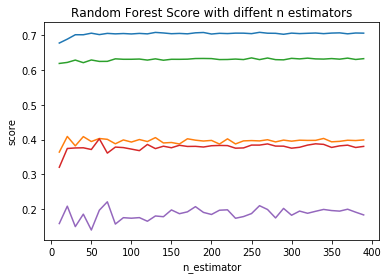

In [43]:
find_best_cluster(df, [[ 'Price', 'Land Size']], exp3_cols, 'Price', 3)

In [44]:
km = KMeans(
    n_clusters=3,
    init= 'random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)
km.fit(df[['Land Size', 'Price']])
y_km = km.predict(df[['Land Size', 'Price']])

Text(0.5, 1.0, 'Clustering of Data set based on h_l_ration and Beds Size')

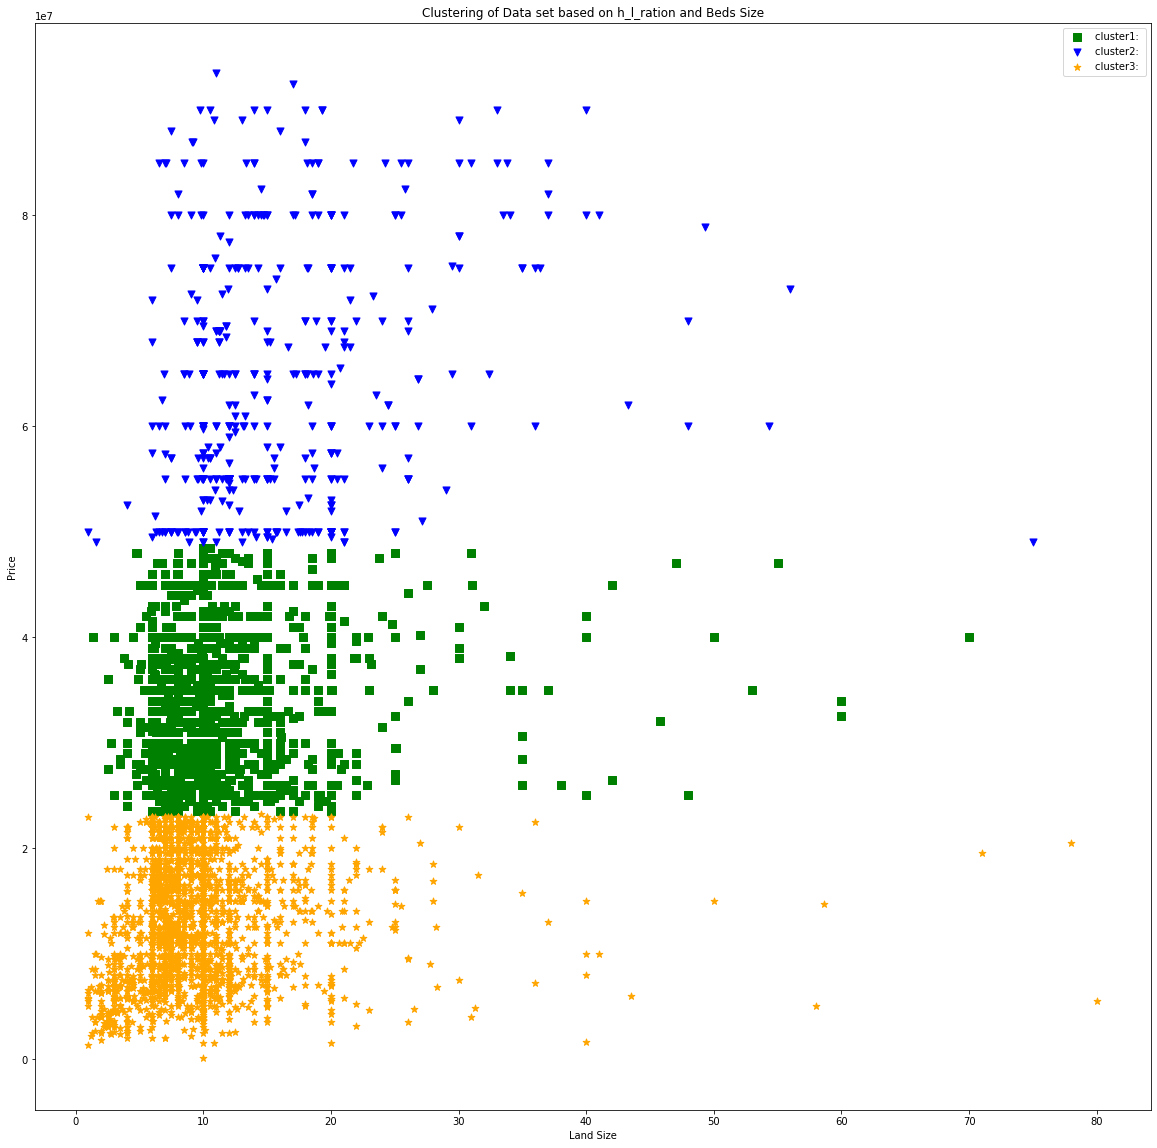

In [56]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(
    df[['Land Size', 'Price']]['Land Size'][y_km==0],
    df[['Land Size', 'Price']]['Price'][y_km==0],
    s=50,
    c='green',
    marker='s',
    label='cluster 1'
)


ax.scatter(
    df[['Land Size', 'Price']]['Land Size'][y_km==1],
    df[['Land Size', 'Price']]['Price'][y_km==1],
    s=50,
    c='blue',
    marker='v',
    label='cluster 2'
)

ax.scatter(
    df[['Land Size', 'Price']]['Land Size'][y_km==2],
    df[['Land Size', 'Price']]['Price'][y_km==2],
    s=50,
    c='orange',
    marker='*',
    label='cluster 1'
)
ax.legend([
    'cluster1: ',
    'cluster2: ' ,
    'cluster3: ' 
          ])
ax.set_xlabel('Land Size')
ax.set_ylabel('Price')
ax.set_title('Clustering of Data set based on h_l_ration and Beds Size')

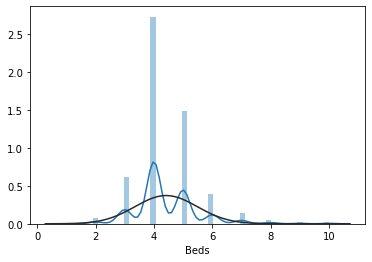

In [54]:
sns.distplot(df[y_km ==0]['Beds'], fit=norm)

-----------------------------------------------
['House Size', 'Land Size', 'Beds']
-----------------------------------------------
Size of clusters : [2349, 2875]
-----------------------------------------------
***************************************************************
min score: 0.5475743417170253
max score: 0.5890326254528993
min rmse: 10422981.405137096
max rmse: 10936085.664743967
min mape: 57.98969072164948
max mape: 62.75773195876288
***************************************************************
***************************************************************
min score: 0.4379816121988977
max score: 0.47599006460314863
min rmse: 7986360.329764658
max rmse: 8270931.09140997
min mape: 91.99157007376186
max mape: 100.84299262381454
***************************************************************
-----------------------------------------------
['House Size', 'Land Size', 'Beds']
-----------------------------------------------
Size of clusters : [606, 2170, 2448]
----------------

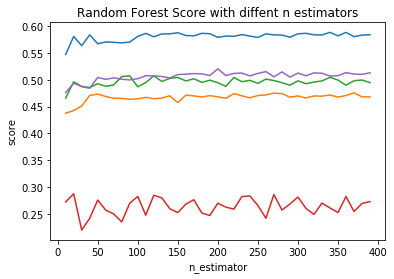

In [57]:
find_best_cluster(df, [['House Size', 'Land Size', 'Beds']], exp3_cols, 'Price', 3)